**Author:** Batjargal (Alex) Bayarsaikhan <br/>
**Date:** July 17-18, 2018

# Statement

This exercise provides a  few datasets in csv format of student performance data derived from the University of Minho, Portugal. The task is a series of analytics questions focused on understanding the data and its relation to predicting the target (G3 >= 10).

The Task:

- You can use either the Math(student-mat) or Portuguese(student-por) dataset.
- Perform some simple exploratory analysis and generate summary statistics to get a sense of what is in the data.
- Describe the quality of the data.
- Generate a few charts that you feel conveys 2 or more important relationships in the data.
- Describe the relationship of the attributes with the final year scores(G1, G2, G3) and share any interesting insights you’ve found.
- Build a model to predict whether a given student is going to pass G3(score >= 10).
- Write all of this into a python notebook, upload to a git repo, and share the link with us to review.  Be prepared to discuss your methodologies and approach.
 

 

Context:
- Assume the audience for your write-up is a non-technical stakeholder.
- Assume the audience for your code is a colleague who may need to read or modify it in the future.

# Part 1 - Analyzing and visualizing student performance data

## Importing libraries 

In [827]:
import pandas as pd # a library for data manipulation and analysis
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder       
from sklearn.preprocessing import StandardScaler,MinMaxScaler  # Feature Scaling

#libraries for chart
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

## Defining a class for student performance report 

In [828]:
#class for presenting student performance report
class StudentPerformanceReport(object):    
    def __init__(self, title, filename, sep=';', constants={}):
        """Initialize the class.
        
        Parameters:
            filename -- path of a file
            sep -- the imaginary part (default ';')            
            
        """
        self.title = title if title else ''
        self.filename = filename
        self.separator = sep
        self.constants = constants
        
        #for storing all data for presenting a report
        self.report_object = {}
        
        # helper variables for presenting report
        self.pre_space = '   '
        
        # defining constant values for report visualization
        self.constants = { 
            'school_GP': 'Gabriel Pereira',
            'school_MS': 'Mousinho da Silveira',
            'gender_F': 'Female',
            'gender_M': 'Male',
            'grade_G1': 'First Period',
            'grade_G2': 'Second Period',
            'grade_G3': 'Final',
            'student_top' : 'Higher than 80%',
            'student_avg' : 'Between 50-80%',
            'student_low' : 'Lower than 50%',
        }
        self.constants.update(constants)
        
        pass
        
    def performAnalysis(self):
        """ to perform analysis on a file data """
        # reading csv file using pandas' read_csv function
        self.student_dataframe = pd.read_csv(self.filename, sep= self.separator)
    
        # using default summary function of pandas library
        self.default_summary = self.student_dataframe.describe()
        
        # to find average, max, min of student age 
        student_age_average = self.default_summary.loc['mean']['age'];
        student_age_max = self.default_summary.loc['max']['age'];
        student_age_min = self.default_summary.loc['min']['age'];
        
        # to find total number of students    
        total_number_of_students = len(self.student_dataframe)
                
        # to find number of studens by school, gender, age    
        number_of_students_by_school = {}
        number_of_students_by_gender = {}
        number_of_students_by_age = {}
        
        for school, indices in self.student_dataframe.groupby('school').groups.items():
            number_of_students_by_school['school_' + school] = len(indices)
            
        for gender, indices in self.student_dataframe.groupby('sex').groups.items():
            number_of_students_by_gender['gender_' + gender] = len(indices)
            
        for age, indices in self.student_dataframe.groupby('age').groups.items():
            number_of_students_by_age[age] = len(indices)
        
        # to find average, max, min of grades
        avg_grades = self.__findAverageGrades()  
        
        # to store the information to report object
        self.report_object['number_of_students_by_school'] = number_of_students_by_school
        self.report_object['number_of_students_by_gender'] = number_of_students_by_gender
        self.report_object['number_of_students_by_age'] = number_of_students_by_age        
        
        self.report_object['total_number_of_students'] = total_number_of_students
        
        self.report_object['student_age_average'] = student_age_average
        self.report_object['student_age_max'] = student_age_max
        self.report_object['student_age_min'] = student_age_min
        
        df = self.student_dataframe
        self.report_object['num_of_stud_higher_80'] = len(df [ df['G3'] >= 16 ])
        self.report_object['num_of_stud_between_50_80'] = len(df [ (9 < df['G3']) & (df['G3'] < 16) ])
        self.report_object['num_of_stud_lower_50'] = len(df [ df['G3'] < 10 ])
        
        self.report_object.update(avg_grades)
        
        pass
        
    def __findAverageGrades(self):
        avg_grades = {
            'grade_G1_mean' : self.default_summary.loc['mean']['G1'] / 20 * 100,
            'grade_G2_mean' : self.default_summary.loc['mean']['G2'] / 20 * 100,
            'grade_G3_mean' : self.default_summary.loc['mean']['G3'] / 20 * 100,
            
            'grade_G1_max' : self.default_summary.loc['max']['G1'],
            'grade_G2_max' : self.default_summary.loc['max']['G2'],
            'grade_G3_max' : self.default_summary.loc['max']['G3'],
            
            'grade_G1_min' : self.default_summary.loc['min']['G1'],
            'grade_G2_min' : self.default_summary.loc['min']['G2'],
            'grade_G3_min' : self.default_summary.loc['min']['G3']            
        }
        return avg_grades
    
    def drawGraphs(self):
        
        legends = [self.constants['student_top'], self.constants['student_avg'], self.constants['student_low']]
        data_for_graphs = self.__prepareDataForGraph()
        
        print('', end='\n')
        print('Visualization:')
        print('-----------------------')
        
        fig = plt.figure(figsize=(12,4))
        axes = fig.subplots(nrows=1, ncols=2)  
        
        data_for_graphs['num_stud_by_grade'].plot(kind='pie', y=0, autopct='%.2f', title='Percentage of students by grade \n', ax=axes[0])
        data_for_graphs['studytime'].plot(kind='bar', title='Weekly study time by grade \n', fontsize=10, ax=axes[1])
        
                
        data_correlations = data_for_graphs['correlations']
        
        fig = plt.figure(figsize=(12,4))
        axes = fig.subplots(nrows=1, ncols=2)        

        axes_subplot_top = data_correlations['grades_corr_top'][:5].plot(kind='bar', ax=axes[0], title='Key factors of Top studens \n whose grades higher than 80% \n')
        axes_subplot_low = data_correlations['grades_corr_low'][:5].plot(kind='bar', ax=axes[1], title='Key factors of Low studens \n whose grades less than 50% \n')
        
        fig = plt.figure(figsize=(12,4))
        axes = fig.subplots(nrows=1, ncols=1)
        axes_subplot_avg = data_correlations['grades_corr_avg'].drop(['school', 'age', 'sex', 'guardian']).plot(kind='bar', stacked=True, ax=axes, title='Compare to average students factors \n')
                        
        axes_subplot_top.legend(legends)
        axes_subplot_avg.legend(legends)
        axes_subplot_low.legend(legends)
        
        pass
    
    def __prepareDataForGraph(self):
                
        grade_columns = ['G1', 'G2', 'G3']
        df = self.student_dataframe.copy()
        
        
        num_of_stud_higher_80 = len(df [ df['G3'] >= 16 ])
        num_of_stud_between_50_80 = len(df [ (9 < df['G3']) & (df['G3'] < 16) ])
        num_of_stud_lower_50 = len(df [ df['G3'] < 10 ])
        
        
        df_num_stud_by_grade = pd.DataFrame([num_of_stud_higher_80, num_of_stud_between_50_80, num_of_stud_lower_50],
                                     index=[self.constants['student_top'], self.constants['student_avg'], self.constants['student_low']])
        
        temp_array_for_encoder = df.iloc[:, :].values

        # Encoding categorical data
        dic_label_encoders = {}

        for column in df.select_dtypes(include=['object']).columns:
            dic_label_encoders[column] = LabelEncoder()
            df[column] = dicLabelEncoders[column].fit_transform(temp_array_for_encoder[:, self.__columnIndexByName(column)])

        df_top_students = df [ df['G3'] >= 16 ].copy()
        correlations_top = df_top_students[df_top_students.columns].corr().drop(grade_columns)
        correlations_G3_top = correlations_top.sort_values('G3', ascending=False)['G3'].rename('G3_top')

        df_average_students = df [ (9 < df['G3']) & (df['G3'] < 16) ].copy() 
        correlations_average = df_average_students[df_average_students.columns].corr().drop(grade_columns)
        correlations_G3_average = correlations_average.sort_values('G3', ascending=False)['G3'].rename('G3_avg')

        df_low_students = df [ df['G3'] < 10 ].copy()
        correlations_low = df_low_students[df_low_students.columns].corr().drop(grade_columns)
        correlations_G3_low = correlations_low.sort_values('G3', ascending=False)['G3'].rename('G3_low')
        
        # combine 3 Series into one dataframe
        df_correlations = pd.concat([correlations_G3_top, correlations_G3_average, correlations_G3_low], axis=1)
        grades_corr_top = df_correlations.sort_values('G3_top', ascending=False)
        grades_corr_avg = df_correlations.sort_values('G3_avg', ascending=False)
        grades_corr_low = df_correlations.sort_values('G3_low', ascending=False)
                            
        # fill missing value by row average        
        grades_corr_top = grades_corr_top.T.fillna(grades_corr_top.mean(axis=1)).T
        grades_corr_avg = grades_corr_avg.T.fillna(grades_corr_avg.mean(axis=1)).T
        grades_corr_low = grades_corr_low.T.fillna(grades_corr_low.mean(axis=1)).T
        
        # to use scaling
        sc = MinMaxScaler()  #StandardScaler()        
        
        grades_corr_top = pd.DataFrame(sc.fit_transform(grades_corr_top.values), index=grades_corr_top.index, columns=grades_corr_top.columns)
        grades_corr_avg = pd.DataFrame(sc.fit_transform(grades_corr_avg.values), index=grades_corr_avg.index, columns=grades_corr_avg.columns)
        grades_corr_low = pd.DataFrame(sc.fit_transform(grades_corr_low.values), index=grades_corr_low.index, columns=grades_corr_low.columns)

        
        #Analysizing Study time
        df_study_time_top = df [ df['G3'] >= 16 ]['studytime'].copy()
        df_study_time_avg = df [ (9 < df['G3']) & (df['G3'] < 16)]['studytime'].copy()
        df_study_time_low = df [ df['G3'] < 10 ]['studytime'].copy()
        
        
        #studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)        
        def calculateStudyTime(value):
            if value == 4:
                return 14
            elif value == 3:
                return 8
            elif value == 2:
                return 3.5
            else: #1
                return 1.5

        study_time_top = df_study_time_top.apply(calculateStudyTime).mean()
        study_time_avg = df_study_time_avg.apply(calculateStudyTime).mean()
        study_time_low = df_study_time_low.apply(calculateStudyTime).mean()
        
        df_study_time = pd.DataFrame([study_time_top, study_time_avg, study_time_low],
                                     index=[self.constants['student_top'], self.constants['student_avg'], self.constants['student_low']])
        
        data_for_graphs = {
            'correlations' : {
                'grades_corr_top' : grades_corr_top,
                'grades_corr_avg' : grades_corr_avg,
                'grades_corr_low' : grades_corr_low
            },
            'studytime' : df_study_time,
            'num_stud_by_grade' : df_num_stud_by_grade
        }
        return data_for_graphs
    
    def __columnIndexByName(self, column_name):
        i = 0
        for name in self.student_dataframe.columns:
            if name == column_name:
                break
            i+=1
        return i
                
    def generateSummary(self):
        """Print summary information of the report object to console
        """
        
        str_filled_frame = '*'.zfill(len(self.title) + 8).replace('0', '*')
        
        print(str_filled_frame)
        print('*** {} ***'.format(self.title))
        print(str_filled_frame)
        print('', end='\n')
        
        print('General information:')
        print('-----------------------')
        print('{}Total number of students: {}'.format(self.pre_space, self.report_object['total_number_of_students']))
        
        print('{}Number of students by gender:'.format(self.pre_space))
        for gender, number in self.report_object['number_of_students_by_gender'].items():
            school = self.constants[gender] if gender in self.constants else gender
            print('       {}: {}'.format(school, number))
        
        print('{}Number of students by school:'.format(self.pre_space))
        for school, number in self.report_object['number_of_students_by_school'].items():
            school = self.constants[school] if school in self.constants else school
            print('       {}: {}'.format(school, number))   
            
        print('', end='\n')
        print('Performance indicators:')
        print('-----------------------')
        print('{}Average grades of total studens:'.format(self.pre_space))
        
        print('{0}{1}: {2:.2f} %'.format(self.pre_space * 2, self.constants['grade_G1'], self.report_object['grade_G1_mean']))
        print('{0}{1}: {2:.2f} %'.format(self.pre_space * 2, self.constants['grade_G2'], self.report_object['grade_G2_mean']))
        print('{0}{1}: {2:.2f} %'.format(self.pre_space * 2, self.constants['grade_G3'], self.report_object['grade_G3_mean']))
                
        print('{}Number of students by grade:'.format(self.pre_space))
        
        print('{}Higher than 80%: {}'.format(self.pre_space * 2, self.report_object['num_of_stud_higher_80']))
        print('{}Between 50-80%: {}'.format(self.pre_space * 2, self.report_object['num_of_stud_between_50_80']))
        print('{}Lower than 50%: {}'.format(self.pre_space * 2, self.report_object['num_of_stud_lower_50']))
        
        pass
        
        

## Usage of  StudentPerformanceReport class

***************************************
*** Math Student Performance Report ***
***************************************

General information:
-----------------------
   Total number of students: 395
   Number of students by gender:
       Female: 208
       Male: 187
   Number of students by school:
       Gabriel Pereira: 349
       Mousinho da Silveira: 46

Performance indicators:
-----------------------
   Average grades of total studens:
      First Period: 54.54 %
      Second Period: 53.57 %
      Final: 52.08 %
   Number of students by grade:
      Higher than 80%: 40
      Between 50-80%: 225
      Lower than 50%: 130

Visualization:
-----------------------


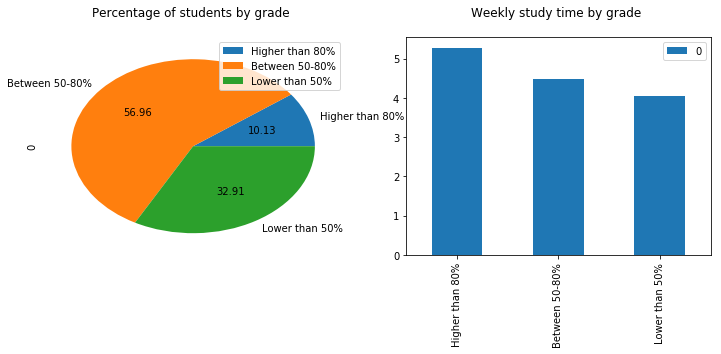

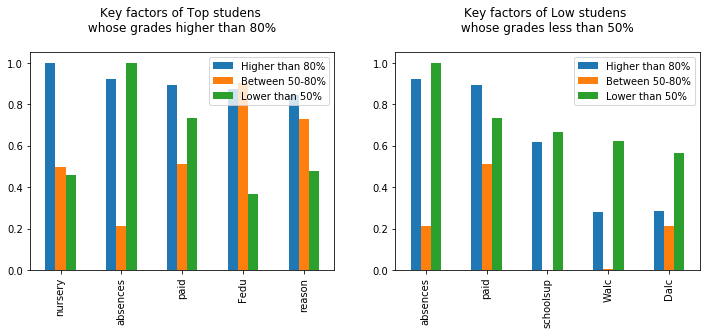

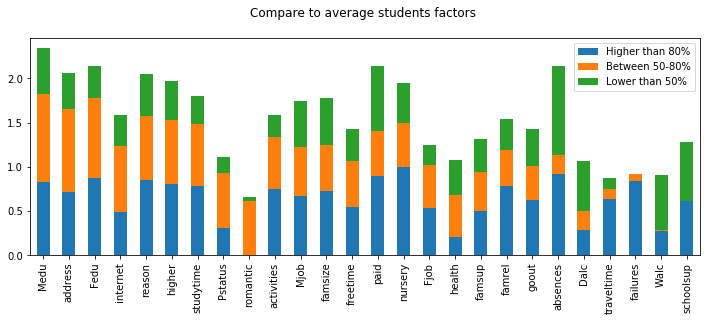

In [829]:
# reading data file of a student performance report
performance_report = StudentPerformanceReport(title='Math Student Performance Report', filename='./student_performance/student-mat.csv', sep=';')

# to perform analysis on a file data 
performance_report.performAnalysis()

# Print summary information of the report object to console
performance_report.generateSummary()

# Visualization
performance_report.drawGraphs()

# Part 2 - Predicting student final grade

## Importing libraries

In [924]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import LabelEncoder, OneHotEncoder # for encoding categorical data
from sklearn.cross_validation import train_test_split # for splitting the dataset into the Training set and Test set
from sklearn.linear_model import LinearRegression # Linear regression


## Defining a class for predicting student final grade

In [929]:
#Used Multiple Linear Regression
class StudentFinalGradePredictionModel:
    def __init__(self, filename, sep=';'):
        self.filename = filename
        self.sep = sep
        
        self.__buildingMLR()
        pass

    def __buildingMLR(self):
        """Building the Multiple Linear Regression"""

        self.__dataPreprocessing()
        
        # Fitting Multiple Linear Regression to the Training set
        self.regressor = LinearRegression()
        self.regressor.fit(self.X_train, self.y_train)
 
    def __dataPreprocessing(self):        
        """Data Preprocessing"""
        
        # Importing the dataset
        self.df = pd.read_csv(self.filename, sep=self.sep)
        X = self.df.iloc[:, 0:-1].values # all columns except 'G3' are input values
        y = self.df.iloc[:, -1].values # column 'G3' is output value

        # Encoding categorical data
        # Encoding the Independent Variable
        columns_indices = []
        for column in self.df.select_dtypes(include=['object']).columns:
            columnIndex = self.__columnIndexByName(column)
            X[:, columnIndex] = LabelEncoder().fit_transform(X[:, self.__columnIndexByName(column)])
            columns_indices.append(columnIndex)
            
        #dummy variables
        onehotencoder = OneHotEncoder(categorical_features = columns_indices)
        X = onehotencoder.fit_transform(X).toarray()        
            
        # Splitting the dataset into the Training set and Test set
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

        # Feature Scaling
        """
        sc_X = StandardScaler()
        X_train = sc_X.fit_transform(X_train)
        X_test = sc_X.transform(X_test)
        sc_y = StandardScaler()
        y_train = sc_y.fit_transform(y_train)"""
        
    def __columnIndexByName(self, column_name):
        i = 0
        for name in self.df.columns:
            if name == column_name:
                break
            i+=1
        return i
    
    def predictTestResult(self):
    
        # Predicting the Test set results
        y_pred = self.regressor.predict(self.X_test)
        y_pred = np.floor(y_pred)        
        
        count_correct = 0
        for i in range(len(y_pred)):
            if y_pred[i] == self.y_test[i]:
                count_correct += 1
                
        accuracy = count_correct / len(y_pred) * 100
        return accuracy

    def predictStudentFinalGrade(self, studentInfo):
    
        # Predicting the user set results
        y_pred = self.regressor.predict(studentInfo)
        
        return y_pred


## Usage of StudentFinalGradePredictionModel class

In [935]:
final_grade_prediction = StudentFinalGradePredictionModel(filename='./student_performance/student-mat.csv', sep=';')
test_accurity = final_grade_prediction.predictTestResult()
print('Test set accuracy: {0:.2f} %'.format(test_accurity))

Test set accuracy: 22.78 %
